In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jane-street-real-time-market-data-forecasting/responders.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/sample_submission.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/features.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=4/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=5/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=6/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=3/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=1/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=8/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=2/part-0.parquet
/kaggle/input/jane-street-real-time-market

In [3]:
##Reading the features and responder csv files to understand the dataset
# Load the dataset
features_data = pd.read_csv('/kaggle/input/jane-street-real-time-market-data-forecasting/features.csv')
responders_data =  pd.read_csv('/kaggle/input/jane-street-real-time-market-data-forecasting/responders.csv')
# Display the first few rows of the dataset


In [4]:
len(features_data)
len(responders_data)

9

In [5]:
features_data.head(10)

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,feature_00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,feature_01,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,feature_02,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,feature_03,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,feature_04,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True
5,feature_05,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
6,feature_06,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
7,feature_07,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
8,feature_08,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
9,feature_09,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
responders_data.head(10)

,responder,tag_0,tag_1,tag_2,tag_3,tag_4
0,responder_0,True,False,True,False,False
1,responder_1,True,False,False,True,False
2,responder_2,True,True,False,False,False
3,responder_3,False,False,True,False,True
4,responder_4,False,False,False,True,True
5,responder_5,False,True,False,False,True
6,responder_6,False,False,True,False,False
7,responder_7,False,False,False,True,False
8,responder_8,False,True,False,False,False


In [ ]:
## The Problem solving for the dataset starts from here starting with installing the right packages ###
######################################################################################################

In [86]:
!pip install polars


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [87]:

import pandas as pd
import polars as pl
train = \
pl.scan_parquet(
    f"/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet"
).\
select(
    pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
    pl.all(),
).collect()

# Read the parquet file and convert to pandas dataframe
# Slice to only get the first 40,000 rows
train_df = train.to_pandas().iloc[:950000]
#In a similar manner i can read the test files
test = \
pl.scan_parquet(
    f"/kaggle/input/jane-street-real-time-market-data-forecasting/test.parquet"
).\
select(
    pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
    pl.all(),
).collect()
test_df = test.to_pandas().iloc[:950000]



In [88]:
train_df.head(10)


,id,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,...,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
0,0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,...,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
1,1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,...,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639,0
2,2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,...,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
3,3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,...,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516,0
4,4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,...,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000,0
5,5,0,0,16,1.118269,NaN,NaN,NaN,NaN,NaN,...,0.505199,0.035095,-1.976849,1.335720,-1.215543,-1.593503,0.840550,0.246794,-0.101013,0
6,6,0,0,19,2.456331,NaN,NaN,NaN,NaN,NaN,...,0.096462,-0.252154,-0.002623,-1.002823,-0.632378,0.112727,-0.807892,-0.704062,0.184303,0
7,7,0,0,33,1.663408,NaN,NaN,NaN,NaN,NaN,...,0.209253,0.182766,0.010843,1.409293,0.002821,0.147636,0.965387,-0.263765,0.280629,0
8,8,0,1,1,3.889038,NaN,NaN,NaN,NaN,NaN,...,0.808660,-0.105820,1.493438,1.387199,0.095372,1.163139,0.751976,0.348024,0.041855,0
9,9,0,1,7,1.370613,NaN,NaN,NaN,NaN,NaN,...,3.119074,1.524680,-0.080976,4.015586,2.337222,5.000000,0.635277,0.009769,0.251455,0


In [37]:
len(test_df)

39

In [6]:
#Lets understand the train_df 
train_df.describe()

,id,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,...,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,0.0,0.0,0.0,0.0,0.0,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0
mean,19999.50000,1.835050,399.639975,12.148275,1.397632,NaN,NaN,NaN,NaN,NaN,...,0.037131,0.114787,0.004302,0.076732,0.066307,0.044906,-0.019932,-0.035073,-0.008679,0.0
std,11547.14972,1.229117,248.277030,10.437579,0.821652,NaN,NaN,NaN,NaN,NaN,...,1.081507,1.361075,0.935086,1.292355,1.253753,1.236552,0.812032,0.794107,0.839218,0.0
min,0.00000,0.000000,0.000000,0.000000,0.440570,NaN,NaN,NaN,NaN,NaN,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,0.0
25%,9999.75000,1.000000,181.000000,3.000000,0.848667,NaN,NaN,NaN,NaN,NaN,...,-0.270414,-0.315491,-0.118420,-0.448189,-0.536579,-0.223556,-0.387758,-0.398120,-0.296363,0.0
50%,19999.50000,2.000000,383.000000,10.000000,1.132566,NaN,NaN,NaN,NaN,NaN,...,0.004938,-0.000864,-0.001640,0.002795,0.000546,0.002667,-0.011024,-0.009043,0.001393,0.0
75%,29999.25000,3.000000,616.000000,16.000000,1.749479,NaN,NaN,NaN,NaN,NaN,...,0.304421,0.392967,0.125333,0.488778,0.608139,0.256679,0.345378,0.323831,0.291265,0.0
max,39999.00000,4.000000,848.000000,38.000000,3.911768,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0


In [7]:
##lets check the null values in the train df
train_df.isnull().sum()

id              0
date_id         0
time_id         0
symbol_id       0
weight          0
               ..
responder_5     0
responder_6     0
responder_7     0
responder_8     0
partition_id    0
Length: 94, dtype: int64

In [8]:
#lets train a simple model on to understand how its working
print(train_df.columns)

Index(['id', 'date_id', 'time_id', 'symbol_id', 'weight', 'feature_00',
       'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05',
       'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
    

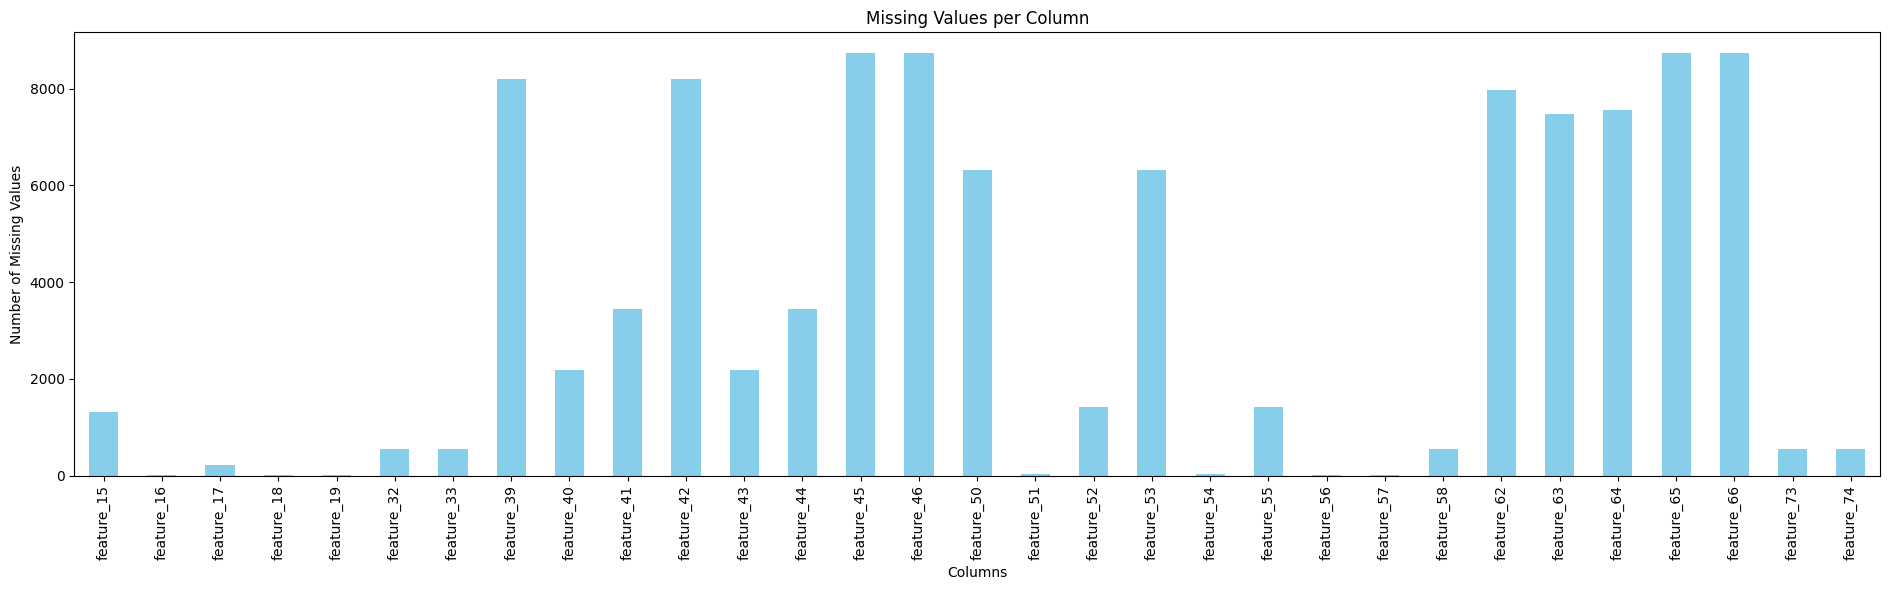

In [13]:
import matplotlib.pyplot as plt
missing_values = train_df.isnull().sum()

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

# Create a bar plot of missing values
plt.figure(figsize=(19, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
print(train_df.columns)

Index(['id', 'date_id', 'time_id', 'symbol_id', 'weight', 'feature_05',
       'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_28',
       'feature_29', 'feature_30', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54',
       'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59',
       'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64',
       'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69',
    

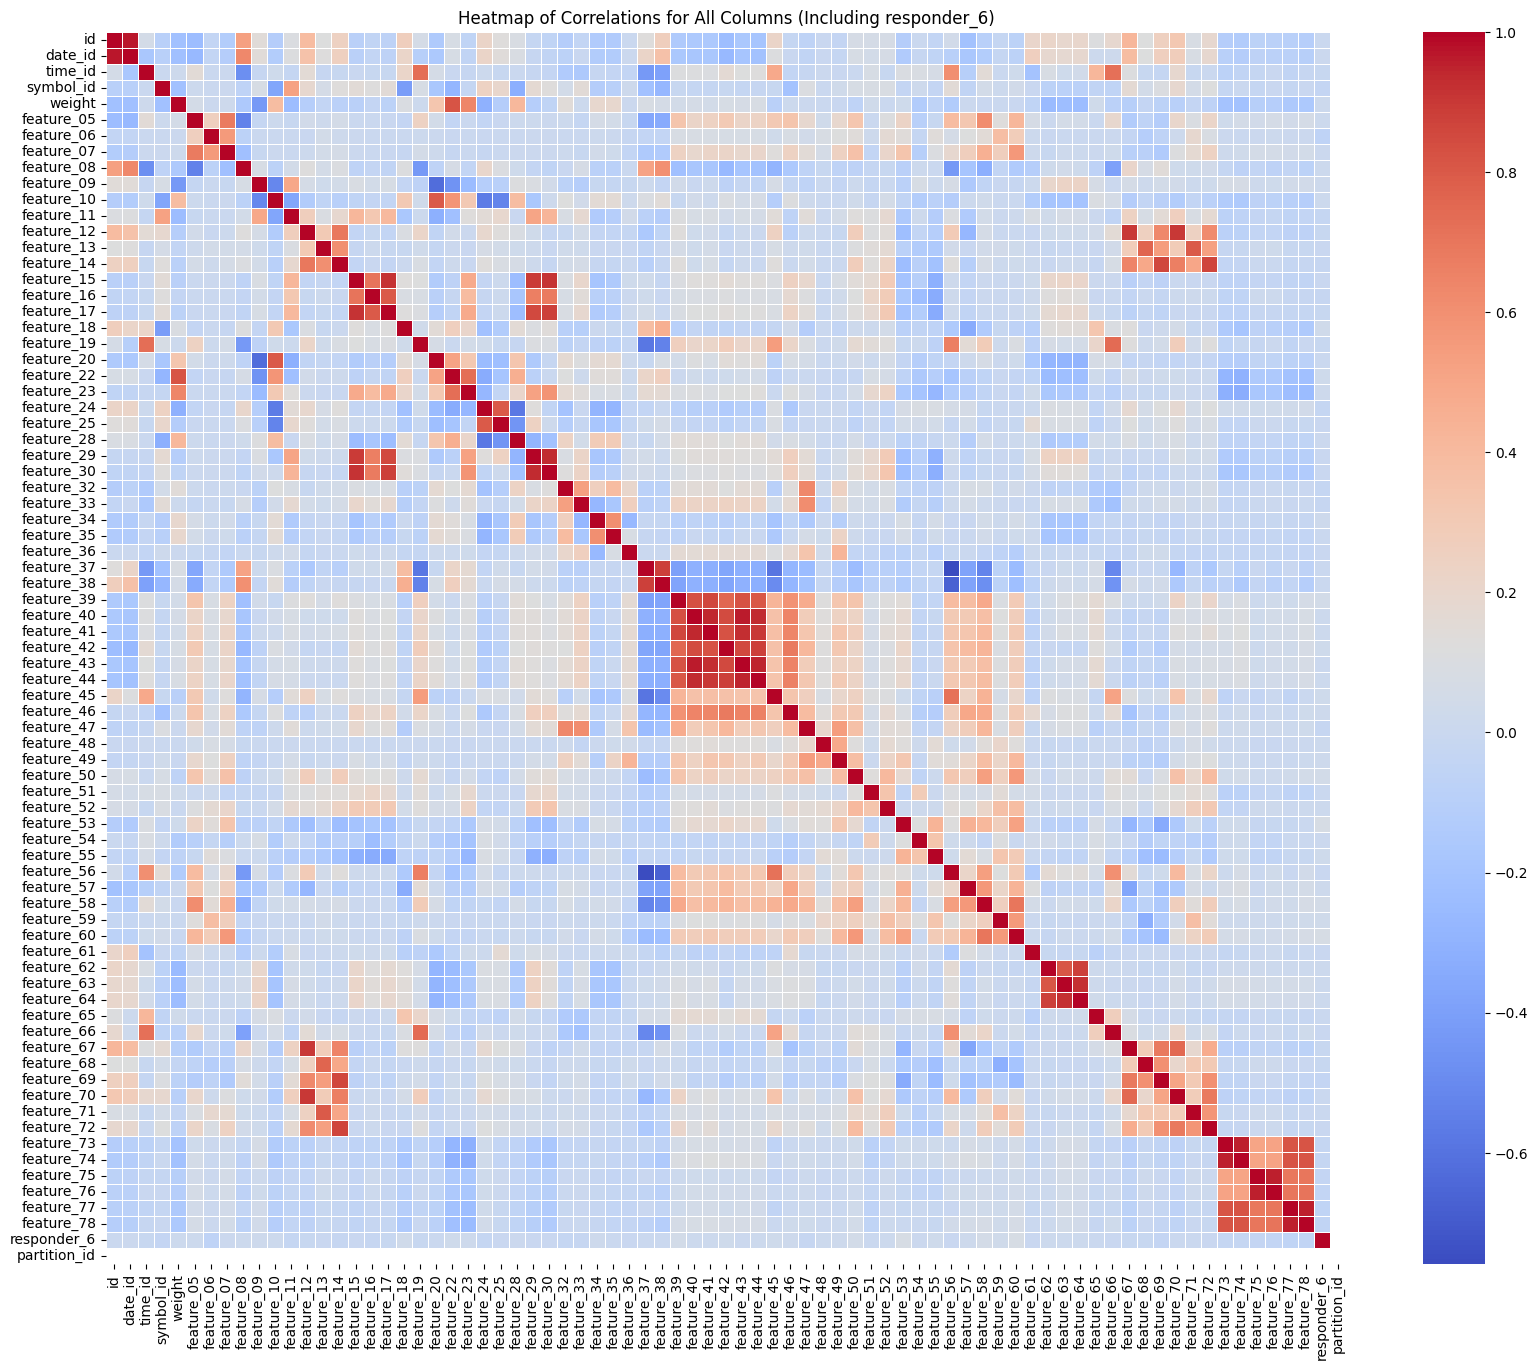

In [34]:
#let createa heatmap of correlations to understand the feature collinearity within the dataset :
import seaborn as sns
import matplotlib.pyplot as plt

# Drop all responder columns except responder_6
data = train_df.drop(columns=['responder_0', 'responder_1', 'responder_2', 'responder_3', 
                        'responder_4', 'responder_5', 'responder_7', 'responder_8'])

# Set up the figure size for a large heatmap
plt.figure(figsize=(20, 16))

# Generate the heatmap for the dataset correlations
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Heatmap of Correlations for All Columns (Including responder_6)')
plt.show()

In [ ]:
## Training a LGM Model for the training dataset to find out the feature importance by using the mode.This is an initial step in
##learning to get the best fit model and make transition to deep learning model using tensorflow.  #########

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Step 1: Drop columns with all NaN values
train_df = train_df.dropna(axis=1, how='all')

# Step 2: Split the data into features and target
X = train_df.drop(columns=['partition_id', 'date_id', 'time_id','id',\
                           'feature_39','feature_40', 'feature_43',\
                           'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',\
                           'feature_62', 'feature_63', 'feature_64','feature_65', 'feature_66','responder_6',\
                           'responder_3','responder_8','responder_7','responder_4','responder_5','responder_2',\
                           'feature_09','feature_06','feature_60','feature_07','feature_15', \
                           'feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_51',\
                           'feature_54','feature_56','feature_57','feature_59',\
                           'feature_61','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72',\
                           'feature_75','feature_76','feature_77','feature_78',\
                            'responder_0','responder_1'])  
# Features
y = train_df['responder_6']  # Target variable
print(X.columns)
# Step 3: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean
X = imputer.fit_transform(X)  # Apply imputer to the features

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize and train the SGDRegressor model
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Index(['symbol_id', 'weight', 'feature_05', 'feature_08', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_41', 'feature_42', 'feature_44',
       'feature_50', 'feature_52', 'feature_53', 'feature_55', 'feature_58',
       'feature_73', 'feature_74'],
      dtype='object')
Mean Squared Error: 0.6802686237437641


In [24]:
#lets see the columsn present within the test_df 
print(test_df.columns)


Index(['id', 'row_id', 'date_id', 'time_id', 'symbol_id', 'weight',
       'is_scored', 'feature_00', 'feature_01', 'feature_02', 'feature_03',
       'feature_04', 'feature_05', 'feature_06', 'feature_07', 'feature_08',
       'feature_09', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_16', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_40', 'feature_43', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_51', 'feature_54',
       'feature_56', 'feature_57', 'feature_59', 'feature_60', 'feature_61',
       'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71',
       'f

In [92]:
#lets prediction the submision.csv file using the above lgbm model and then we can improve further ###
import pandas as pd

import pandas as pd

# Step 1: Drop unnecessary columns in the test dataset
# Columns to drop in test_df based on the columns that were dropped from train_df
columns_to_drop_in_test = ['is_scored','feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
                           'feature_51', 'feature_54', 'feature_56', 'feature_57', 'feature_59',
                           'feature_61', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 
                           'feature_71', 'feature_72', 'feature_75', 'feature_76', 'feature_77',
                           'feature_78','feature_00', 'feature_01', 'feature_02', 'feature_03','feature_04',\
                          'feature_06', 'feature_07', 'feature_09', 'feature_21','feature_21','feature_26','feature_27',\
                          'feature_31','feature_40','feature_43','feature_45','feature_46','feature_47',\
                          'feature_48','feature_49','feature_60','feature_62','feature_63','feature_64','feature_65',\
                          'feature_66','id', 'row_id', 'date_id', 'time_id','feature_15','feature_33','feature_39']

# Drop the columns from test_df that were not used in training
X_test_df = test_df.drop(columns=columns_to_drop_in_test)

# Step 2: Handle missing values in test_df using the same SimpleImputer from train_df
X_test_df = imputer.transform(X_test_df)  # Use the same imputer fitted on the training data

# Step 3: Standardize test_df using the same StandardScaler from train_df
X_test_df_scaled = scaler.transform(X_test_df)  # Use the same scaler fitted on the training data

# Step 4: Make predictions on the test_df using the trained model
y_test_pred = model.predict(X_test_df_scaled)

# Step 5: Create a DataFrame with 'id' column and the predictions
submission_df = pd.DataFrame({
    'id': test_df['id'],  # Use 'id' column from test_df as identifier
    'prediction': y_test_pred
})

# Step 6: Save the DataFrame as a CSV file for submission to Kaggle
submission_df.to_csv('submission.csv', index=False)
print(submission_df)
print("Submission file 'submission.csv' created successfully!")



    id  prediction
0    0    0.033070
1    1    0.035793
2    2    0.032921
3    3    0.033771
4    4    0.036174
5    5    0.033587
6    6    0.037937
7    7    0.028353
8    8    0.032918
9    9    0.036640
10  10    0.032895
11  11    0.034389
12  12    0.030231
13  13    0.031656
14  14    0.035534
15  15    0.035002
16  16    0.026614
17  17    0.028641
18  18    0.032341
19  19    0.021814
20  20    0.034960
21  21    0.033590
22  22    0.033642
23  23    0.031738
24  24    0.031791
25  25    0.031115
26  26    0.033103
27  27    0.026505
28  28    0.031184
29  29    0.032029
30  30    0.030554
31  31    0.031489
32  32    0.031288
33  33    0.031433
34  34    0.025102
35  35    0.031290
36  36    0.031504
37  37    0.029844
38  38    0.021661
Submission file 'submission.csv' created successfully!


Submission file created successfully!


       Feature  Coefficient  Abs_Coefficient
20  feature_30     0.053797         0.053797
9   feature_16    -0.038642         0.038642
19  feature_29    -0.035713         0.035713
29  feature_58     0.033228         0.033228
2   feature_05    -0.031148         0.031148
8   feature_14     0.028815         0.028815
30  feature_73    -0.025360         0.025360
12  feature_19    -0.022737         0.022737
5   feature_11    -0.019990         0.019990
4   feature_10    -0.019945         0.019945
27  feature_53    -0.019879         0.019879
22  feature_41    -0.017620         0.017620
3   feature_08     0.015458         0.015458
6   feature_12    -0.014234         0.014234
15  feature_23     0.014023         0.014023
28  feature_55     0.013968         0.013968
11  feature_18     0.013866         0.013866
31  feature_74    -0.013285         0.013285
25  feature_50    -0.011055         0.011055
7   feature_13     0.010676         0.010676
16  feature_24    -0.010577         0.010577
24  featur

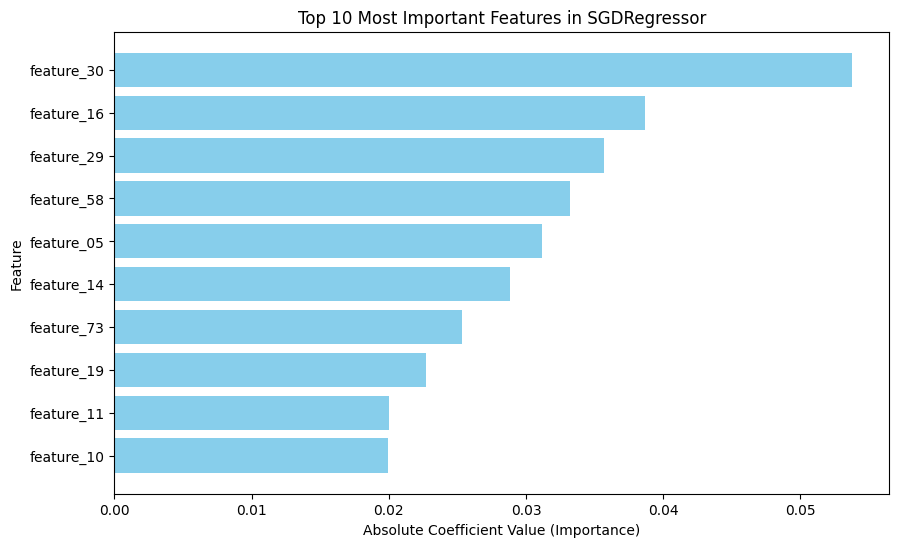

In [93]:
# Step 9: Get feature importance (coefficients)
import matplotlib.pyplot as plt
coefficients = model.coef_

# Step 10: Create a DataFrame to display feature importance
features_df = pd.DataFrame({
    'Feature': train_df.drop(columns=[ 'partition_id', 'date_id', 'time_id','id',\
                           'feature_39','feature_40', 'feature_43',\
                           'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',\
                           'feature_62', 'feature_63', 'feature_64','feature_65', 'feature_66','responder_6',\
                           'responder_3','responder_8','responder_7','responder_4','responder_5','responder_2',\
                           'feature_09','feature_06','feature_60','feature_07','feature_15', \
                           'feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_51',\
                           'feature_54','feature_56','feature_57','feature_59',\
                           'feature_61','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72',\
                           'feature_75','feature_76','feature_77','feature_78',\
                            'responder_0','responder_1']).columns,
    'Coefficient': coefficients
})

# Step 11: Sort by absolute coefficient value to get the most important features
features_df['Abs_Coefficient'] = features_df['Coefficient'].abs()
top_features = features_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted feature importance
print(top_features)

# Step 12: Optionally, visualize the top 10 features
top_10_features = top_features.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in SGDRegressor')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

In [94]:
# Step 6: Get and print the coefficients (these represent the model weights)
coefficients = model.coef_

# Display the coefficients
print("Model Coefficients (Weights):")
for feature, coef in zip(train_df.drop(columns=['partition_id', 'date_id', 'time_id', 'id']).columns, coefficients):
    print(f"{feature}: {coef}")

Model Coefficients (Weights):
symbol_id: -0.002548550721257925
weight: -0.0031477969605475664
feature_05: -0.031147966161370277
feature_06: 0.015457741916179657
feature_07: -0.019944751635193825
feature_08: -0.019990338012576103
feature_09: -0.014234366826713085
feature_10: 0.010675585828721523
feature_11: 0.02881484478712082
feature_12: -0.03864234313368797
feature_13: 0.0013822090113535523
feature_14: 0.013865950517356396
feature_15: -0.022736545652151108
feature_16: 0.0034033695701509714
feature_17: 0.006246468052268028
feature_18: 0.01402272004634142
feature_19: -0.010577148757874966
feature_20: -0.000765388656873256
feature_22: -0.005340029019862413
feature_23: -0.035713352262973785
feature_24: 0.05379682034254074
feature_25: -0.0037859186995774508
feature_28: -0.017619673162698746
feature_29: 0.003539703320711851
feature_30: 0.0063338568434119225
feature_32: -0.011054734699428082
feature_33: -0.0009402271825820208
feature_34: -0.019878819584846497
feature_35: 0.013968189246952534

In [28]:
import tensorflow as tf

# Verify TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Create a simple constant tensor and print it
hello = tf.constant("Hello, TensorFlow!")
print(hello)

# Start a simple session
tf.print(hello)



TensorFlow version: 2.16.1
tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)
Hello, TensorFlow!


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input

# Step 1: Drop columns with all NaN values
train_df = train_df.dropna(axis=1, how='all')

# Step 2: Split the data into features and target
X = train_df.drop(columns=['partition_id', 'date_id', 'time_id', 'id', 
                           'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 
                           'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 
                           'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'responder_6', 
                           'responder_3', 'responder_8', 'responder_7', 'responder_4', 'responder_5', 'responder_2', 'feature_09'])  # Features
y = train_df['responder_6']  # Target variable

# Step 3: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean
X = imputer.fit_transform(X)  # Apply imputer to the features

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model using the Input layer
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(64, activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set (flatten the output for evaluation)
y_pred = model.predict(X_test_scaled).flatten()  # Flatten to convert 2D to 1D

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1/100


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/local/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/local/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/usr/local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/usr/local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/local/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/local/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/usr/local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/usr/local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/usr/local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/usr/local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_13/1157060458.py", line 42, in <module>

  File "/usr/local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_11702]